In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob 
import pandas as pd

In [2]:
ati = pd.read_csv('../data/atium.csv', index_col=0)
kics = ati.KIC.values
print(f'Working with {len(kics)} stars')

Working with 95 stars


In [3]:
%%time
d = '/home/oliver/PhD/mnt/RDS/malatium/models/'
post_pa = []
for kic in kics:
    try:
        post_pa.append(pd.read_csv(f"{d}{int(kic)}_samples.csv")['P_A'])
    except FileNotFoundError:
        continue               

CPU times: user 13.5 s, sys: 1.41 s, total: 14.9 s
Wall time: 15.8 s


In [4]:
bins = np.linspace(0, 1, 50)
hists = [np.histogram(n, bins=bins, density=True)[0] for n in post_pa]

Text(0, 0.5, 'Unnormalised probability')

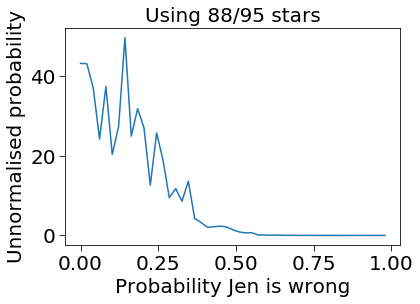

In [5]:
posterior = np.prod(hists, axis=0)
plt.plot(bins[:-1], np.prod(hists, axis=0))
plt.title(f'Using {len(post_pa)}/95 stars')
plt.xlabel('Probability Jen is wrong')
plt.ylabel('Unnormalised probability')

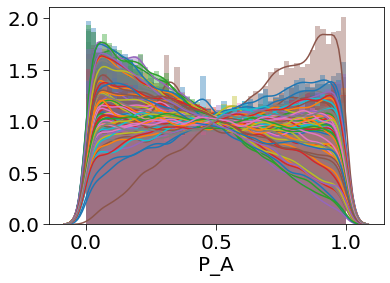

In [6]:
for n in post_pa:
    sns.distplot(n)

Let's just try doing the above but with KDE's...

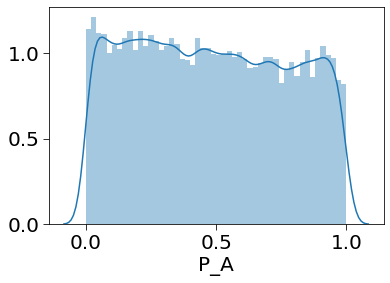

In [7]:
t = post_pa[0]
sns.distplot(t)

In [8]:
from scipy.stats import gaussian_kde
kde = gaussian_kde(t,bw_method='scott')

In [9]:
from pyqt_fit import kde_methods
kde2 = kde.KDE1D(x, lower=0, upper=1, method=kde_methods.linear_combination)

ModuleNotFoundError: No module named 'pyqt_fit'

In [ ]:
sns.distplot(t)
x = np.linspace(0., 1., 100)
plt.plot(x, kde(x))
plt.plot(x, kde2.cdf)

It works, but loses efficiency at the edges, as expected